
# **Predmet:** Principi prezentacije i prepoznavanja oblika 
### **Tema:** Detekcija i klasifikacija defekata čelika
### **Student:** Jelić Dajana 
### **Index:** IT36-2018

Tema ovog projekta je detekcija i klasifikacija oštećenja koja se nalaze na površini čelika. Cilj projekta jeste pronalazak defekta uz pomoć algoritma kako bi se odredio kvalitet čelika radi daljeg korišćenja. Za izradu projekta korišćen je set podataka u vidu fotografija na kojima je prikazano oštećenje čelika. Algoritam se sastoji od postupka detekcije oštećenja materijala i klasifikacije fotografija. Fotografije se mogu klasifikovati u :


*   Oštećena površina čelika
*   Neoštećena površina čelika





# **Učitavanje i vizualizacija podataka**

Prvi korak u izradi projekta jeste učitavanje seta podataka koji će služiti za rad algoritma. Set podataka nalazi se u deljenom folderu i sastoji se od skupa fotografija.

In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS" -O images.zip && rm -rf /tmp/cookies.txt

--2022-09-05 14:36:33--  https://docs.google.com/uc?export=download&confirm=t&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS
Resolving docs.google.com (docs.google.com)... 209.85.200.100, 209.85.200.101, 209.85.200.138, ...
Connecting to docs.google.com (docs.google.com)|209.85.200.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3vc1i1ha7akh62aa33qud3cthl3lgg5r/1662388575000/06049624160957438625/*/1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS?e=download&uuid=1e1b3e10-0e09-4028-bc4b-3f03997244b1 [following]
--2022-09-05 14:36:33--  https://doc-0g-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3vc1i1ha7akh62aa33qud3cthl3lgg5r/1662388575000/06049624160957438625/*/1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS?e=download&uuid=1e1b3e10-0e09-4028-bc4b-3f03997244b1
Resolving doc-0g-64-docs.googleusercontent.com (doc-0g-64-docs.googleusercontent.com)... 209.85.147.132, 

Kako se slike nalaze u folderu koji je zipovan, neophodno ih je unzipovati radi daljeg korišćenja.

In [2]:
!unzip images.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_images/99f75320d.jpg  
  inflating: train_images/99f9d2375.jpg  
  inflating: train_images/99fd3c6f5.jpg  
  inflating: train_images/9a016fe15.jpg  
  inflating: train_images/9a064450d.jpg  
  inflating: train_images/9a08c2783.jpg  
  inflating: train_images/9a18e4457.jpg  
  inflating: train_images/9a1f7c238.jpg  
  inflating: train_images/9a2523ce9.jpg  
  inflating: train_images/9a3e774ff.jpg  
  inflating: train_images/9a5e9e77c.jpg  
  inflating: train_images/9a5f7a855.jpg  
  inflating: train_images/9a62177bb.jpg  
  inflating: train_images/9a67575cf.jpg  
  inflating: train_images/9a6ac5406.jpg  
  inflating: train_images/9a70057c0.jpg  
  inflating: train_images/9a72fd89e.jpg  
  inflating: train_images/9a75974ba.jpg  
  inflating: train_images/9a762b892.jpg  
  inflating: train_images/9a7b2f3af.jpg  
  inflating: train_images/9a7b427b4.jpg  
  inflating: train_images/9a81a8056.jpg  
  inflating: train_images

Kako su fotografije još uvek nepoznate, a potrebno je poznavanje i razumevanje seta podataka, učitane su pojedine fotografije. 

Biblioteka matplotlib upravo omogućava prikaz fotografija koje su vidljive ljudskim okom.

In [3]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

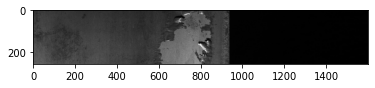

In [4]:
image =(imread('train_images/fe56055d0.jpg'))
plt.imshow(image)
plt.show()

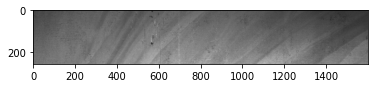

In [5]:
image =(imread('train_images/fab50d91a.jpg'))
plt.imshow(image)
plt.show()

Detaljnom dugoročnom analizom fotografija uz pomoć interneta, utvrđeno je da se na fotografijama nalaze slike ćelika i njegova oštećenja.



Za izradu projekta učitane su sve potrebne biblioteke

In [7]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import keras
from PIL import Image
from pathlib import Path
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.models import Sequential, Model, load_model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.optimizers import adam_v2, sgd_experimental, rmsprop_v2
from keras.callbacks import Callback, EarlyStopping
from keras.utils import tf_utils
from sklearn.metrics import confusion_matrix
from keras import backend as K
import tensorflow as tf
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

U mašinskom učenju koristimo skup uzoraka za treniranje pri čemu je cilj otkrivanje strukture podataka. Kako bi algoritam mogao da radi potrebno ga je istrenirati. 

Postoje razni formati za tabelarno predstavljanje podataka, a najjednostavniji od njih se zove CSV. Iz tog razloga bilo je potrebno učitati csv fajl u okviru kog se nalaze nazivi fotografija, klase kojoj pripadaju i enkodovane vrednosti pixela fotografija. 

In [8]:
data = pd.read_csv("/content/train.csv")

U sledećim koracima sledi upoznavanje sa podacima

---
Svaka slika ima svoj jedinstveni identifikator, klasu kojoj pripada i enkriptovanu vrednost u piskelima.
Funkcija head(N) prikazuje prvih N redova tabele. Ako funkciju pozovemo bez broja ona će prikazati prvih pet redova:

In [9]:
data.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


Oblik niza je br. elemenata u svakoj dimenziji. U NumPi-u se koristi funkcija pod nazivom shape koja vraća torke tj. br elemenata.  

In [10]:
data.shape

(7095, 3)

In [11]:
data.info

<bound method DataFrame.info of             ImageId  ClassId  \
0     0002cc93b.jpg        1   
1     0007a71bf.jpg        3   
2     000a4bcdd.jpg        1   
3     000f6bf48.jpg        4   
4     0014fce06.jpg        3   
...             ...      ...   
7090  ffcf72ecf.jpg        3   
7091  fff02e9c5.jpg        3   
7092  fffe98443.jpg        3   
7093  ffff4eaa8.jpg        3   
7094  ffffd67df.jpg        3   

                                          EncodedPixels  
0     29102 12 29346 24 29602 24 29858 24 30114 24 3...  
1     18661 28 18863 82 19091 110 19347 110 19603 11...  
2     37607 3 37858 8 38108 14 38359 20 38610 25 388...  
3     131973 1 132228 4 132483 6 132738 8 132993 11 ...  
4     229501 11 229741 33 229981 55 230221 77 230468...  
...                                                 ...  
7090  121911 34 122167 101 122422 169 122678 203 122...  
7091  207523 3 207777 9 208030 15 208283 22 208537 2...  
7092  105929 5 106177 14 106424 24 106672 33 106923 ...  
709

Podaci su prikazani pomoću bar plota. Dijagram prikazuje broj elemenata u svakoj klasi.

3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64

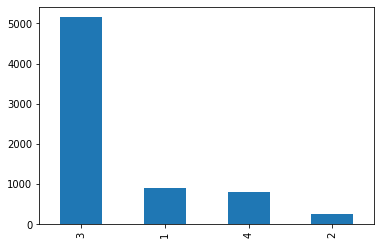

In [12]:
data["ClassId"].value_counts().plot(kind = 'bar')
data["ClassId"].value_counts()

Podaci poput računanja minimalne, maksimalne vrednosti, medijane, sredine nisu od značaja za ovaj set podataka. 

*Zakljucak* 
Svaka slika tj. podatak ima svoj id, klasu i enkriprovanu vrednost. Najvise podataka pripada 3 klasi dok najmanje podataka pripada drugoj klasi. Set podataka je zaista velik i sadrzi 7095 slika oštećena metala

# **Augmentacija slika**

Augmentacija fotografija predstavlja procedura u okviru koje se skup podataka ciljano proširuje primenom različitih transformacija koje se sprovode nad slikama. Svrha augmentacije je dvostruka, s jedne strane poboljšava preciznost i tačnost modela, a s druge će omogućiti generalizovanje modela. Primenom raznih transformacija moguće je konstruisati slike koje se dosta razlikuju od onih koje se nalaze u skupu podataka, ali se očekuje da model može ispravno da ih klasifikuje.

Kako bi se postiglo da sve kategorije imaju približno isti broj slika koristi se
augmentacija podataka. U sledecoj liniji koda omogućen je prikaz progresa realizacije prolaska kroz podatke. Na kraju izvršavanja imamo dva niza. U prvom nizu nalaze se sve fotografije dok se u drugom nizu nalaze se klase fotografija u određenom redosledu. 

In [13]:
l1=[]
l2=[]
for img,ClassId,EncodedPixels in tqdm(data.values):
  image=cv2.imread("/content/train_images/{}".format(img), cv2.IMREAD_COLOR)
  image=cv2.resize(image, (150,150))
  l1.append(image)
  l2.append(ClassId)

100%|██████████| 7095/7095 [01:03<00:00, 112.49it/s]


Prikaz pojedinih fotografija iz novogenerisanog niza:

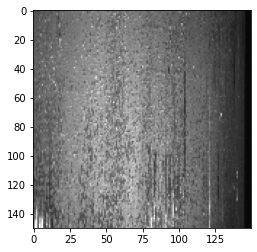

In [14]:
i = 50
plt.imshow(l1[i])

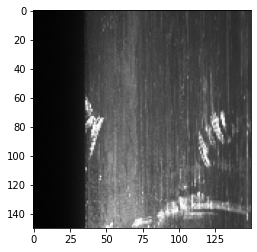

In [15]:
i = 100
plt.imshow(l1[i])

# **Normalizacija**

Normalizacija je proces reskaliranja svih vrednosti u opseg od 0 do 1. Na taj način sve vrednosti jednako utiču na računanje distance između instanci, što je pogodno za klasifikacionu upotrebu. 

Potrebno je piksele prevesti u numerički zapis, kako bi na taj način algoritam mogao jednostavnije da ih obrađuje i koristi za donošenje odluke. Neophodno je prevesti tekst razumljiv čoveku u jezik koji je razumljiv mašini. Baš iz tog razloga neophodno je koristiti encoder. Label Endcoder može se koristi za normalizaciju podataka, koji input pretvara u klasu označenu brojevima od 0 do n-1, gde je n broj elemenata input-a. Korišćena je metoda fit_transform koja prima vrednosti kao parametre a vraća enkodirane vrednosti.

In [16]:
encoder = LabelEncoder()

X=np.array(l1)
X=X/255

y=encoder.fit_transform(l2)
y=to_categorical(y)

# **Treniranje modela**

Cilj implementacije algoritma nadgledanog ucenja jeste dobijanje “dovoljno” dobrog prediktivnog modela na osnovu raspolozivog seta podataka.

Set podataka koji se koristi za formiranje modela - trening set

Set podatak koji se koristi za procenu valjanosti modela - test set

Trening set i test set ne smeju imati/deliti zajednicke elemente tj. opservacije

Alogiram koristi trening podatke za učenje, da bi kasnije nad test podacima mogao da izvrši postupak detekcije oštećenja i klasifikacije fotografija u odgovarajuću klasu. 
Set podatak je podeljen u odnosu 80:20, 80% seta podataka se koristi za treniranje modela, a 20% se koristi za testiranje modela.

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True,random_state=50)

In [18]:
print("X trening: ",X_train.shape)
print("X test: ",X_test.shape)
print("y trening: ",y_train.shape)
print("y test: ",y_test.shape)

X trening:  (5676, 150, 150, 3)
X test:  (1419, 150, 150, 3)
y trening:  (5676, 4)
y test:  (1419, 4)


## Kreiranje Konvolucijske Neuronske Mreže (CNN) modela 

Konvolucijske neuronske mreže (eng. Convolutional neural networks ili CNN) predstavljaju specijaliziran tip neuronskih mreža za procesiranje podataka koji se mogu svrstati u kategoriju mrežaste topologije (eng. grid-like topology). CNN predstavlja određeni tip duboke NN arhitekture koja je posebno dobro prilagođena skupovima podataka slika. CNN se sada koristi u računarskom vidu za postizanje vrhunskih rezultata za različite zadatke prepoznavanja slika.

In [19]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))

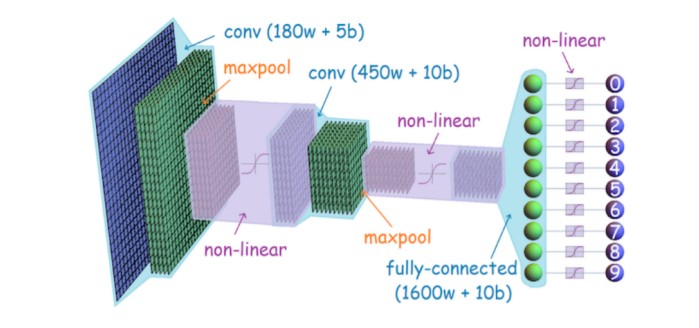

Konvolutivna mreza se sastoji od konvolutivnih slojeva, slojeva
agregacije i standardne potpuno povezane neuronske mreze.
Uloga slojeva konvolucije je da vrse operacije konvolucije i tako konstruisu atribute. Ako je na ulazu slika, izlaz iz sloja konvolucije ce biti neka nova slika. Uloga slojeva agregacije je da agregiraju informaciju dobijenu iz konvolutivnog sloja (npr. da svedu sliku na manju rezoluciju uprosecavanjem, maksimumom ili
slicno)

Na kraju dolazimo do finalnih slika male dimenzije. Svaka slika je jedna matrica. Tada se tipicno sve vrednosti koje se nalaze u ovim matricama poredaju u jedan vektor i taj vektor se koristi kao ulaz u potpuno povezanu mrezu.

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 256)               3

Zastuvljanje treniranja modela kada metrike prestanu da ostvaruju bolje rezultate.

patience - broj epoha nakon koje se prekida trening ukoliko u okviru svake od epoha metrike ne pokažu bolje rezultate;

min_delta - minimalna promena praćene metrike koja će se smatrati poboljšanjem; 

restore_best_weights - da li vratiti najbolje rezultate iz prethodne epohe u trenutnu epohu.

In [21]:
#early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2,mode="min",monitor="val_loss",restore_best_weights=True)

## Kompajlovanje modela

Kompajliranje/konfigurisanje modela pre treninga se postiže metodom compile, argumenti metode su: loss - funkcija gubitka, njena svrha je da izračuna količinu metrike koju model treba da minimizira. U ovom slučaju funkcija koja se koristi omogućava izračunavanje unakrsne entropije između oznaka i prediktora; optimizer - optimizator klase. Adam klasa je optimizator koji minimizira grešku i implementira Adamov algoritam. Adamov optimizator je metoda stohastičkog gradijentalnog spusta koja se zasniva na adaptivnoj proceni momenta prvog i drugog reda. metrics - lista metrika koje će model da evaluira tokom treninga i testa, u ovom slučaju prati se tačnost (accuracy).

In [22]:
from sklearn import metrics
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

Sledeći korak je treniranje modela za 10 epoha. Postupak se vrši primenom metode fit na kreirani model. 

In [23]:
history = model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1, callbacks=[early_stopping])

Epoch 1/15
45/45 [==============================] - 115s 3s/step - loss: 0.8075 - accuracy: 0.7280 - val_loss: 0.7001 - val_accuracy: 0.7393
Epoch 2/15
45/45 [==============================] - 122s 3s/step - loss: 0.6597 - accuracy: 0.7502 - val_loss: 0.6285 - val_accuracy: 0.7555
Epoch 3/15
45/45 [==============================] - 124s 3s/step - loss: 0.6222 - accuracy: 0.7562 - val_loss: 0.6316 - val_accuracy: 0.7604
Epoch 4/15
45/45 [==============================] - 124s 3s/step - loss: 0.5809 - accuracy: 0.7667 - val_loss: 0.5949 - val_accuracy: 0.7590
Epoch 5/15
45/45 [==============================] - 125s 3s/step - loss: 0.5425 - accuracy: 0.7734 - val_loss: 0.5642 - val_accuracy: 0.7674
Epoch 6/15
45/45 [==============================] - 116s 3s/step - loss: 0.5123 - accuracy: 0.7831 - val_loss: 0.5940 - val_accuracy: 0.7576
Epoch 7/15
45/45 [==============================] - 114s 3s/step - loss: 0.5234 - accuracy: 0.7863 - val_loss: 0.5975 - val_accuracy: 0.7625


Nakon što je izvršeno kompajliranje i prolazak kroz set podataka u n epoha, rezultati treninga se smeštaju u data frame i rezultati se prikazuju putem grafova.



Sledeci graf se odnosi na funkciju gubitka

loss je vrednost funkcije za trening podatke

val_loss je vrednost funkcije za model podatke

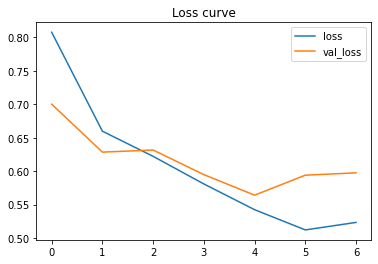

In [24]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

Drugi grafik se odnosi na tačnost kao metrika koja je praćena tokom treninga.

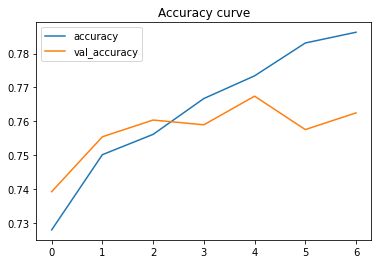

In [25]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

Metodi evaluate prosleđuju se test setovi obeležja i ciljanih vrednosti. Metoda vraća rezultate gubitka i tačnosti koji su dobijeni primenom modela na set podataka. Ovim modelom dobijena je tačnost predviđanja klase slika 76.74%.

In [26]:
result = model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

45/45 [==============================] - 8s 178ms/step - loss: 0.5642 - accuracy: 0.7674
[+] Accuracy: 76.74%


# Detekcija oštećenja

Detekciji oštećenja podrazumeva klasifikovanje fotografija u odnosu na detektovana oštećenja. 

In [27]:
import random

U promenljivu df smešten je train.csv fajl 

In [28]:
df = pd.read_csv('/content/train.csv')

Prikaz oblika promenljive df

In [29]:
print('Dataframe shape: ', df.shape)
df.head()

Dataframe shape:  (7095, 3)


,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


Podela df promenljive na osnovu vrednosti ImageId.

In [30]:
df['ImageId'] = df['ImageId'].apply(lambda x: x.strip())
df.ImageId.describe()

count              7095
unique             6666
top       ef24da2ba.jpg
freq                  3
Name: ImageId, dtype: object

In [32]:
train_img_set = set(list(os.listdir('train_images')))
print('Ukupan broj fotografija u train_images folderu: ', len(train_img_set))
defect_img_set = set(df['ImageId'].values)
print('Ukupan broj fotografija uključenih u fajl train.csv: ', len(defect_img_set))
if (defect_img_set.issubset(train_img_set)):
    print('Svi ImageId koji se nalaze u train.csv su takođe u train_images folderu.')

Ukupan broj fotografija u train_images folderu:  12568
Ukupan broj fotografija uključenih u fajl train.csv:  6666
Svi ImageId koji se nalaze u train.csv su takođe u train_images folderu.


Na sledećem grafiku prikazane su procentualne vrednosti slika po klasama uz pomoc pita dijagrama

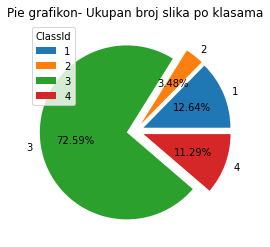

,ClassId,Count,count-percentage
0,1,897,12.642706
1,2,247,3.481325
2,3,5150,72.586328
3,4,801,11.289641


In [40]:
ClassId_cnt_df = pd.DataFrame(df['ClassId'].value_counts().sort_index()).rename(columns = {'ClassId':'Count'})
ClassId_cnt_df['count-percentage'] = ClassId_cnt_df*100/ClassId_cnt_df.sum()

plt.pie(ClassId_cnt_df['Count'], labels = ClassId_cnt_df['Count'].index, explode = [0.1]*4, startangle = 0, autopct='%1.2f%%')
plt.legend(title = "ClassId")
plt.title('Pie grafikon- Ukupan broj slika po klasama')
plt.show()

ClassId_cnt_df.reset_index().rename(columns = {'index':'ClassId'})

Na sledećem grafiku je procentualno prikazan broj slika koje su oštećene i koje nisu oštećene

Broj ImageId-ijeva koji nisu oštećeni:  5902


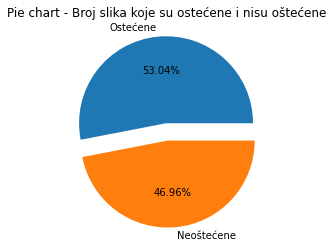

In [41]:
print('Broj ImageId-ijeva koji nisu oštećeni: ', len(train_img_set) - len(defect_img_set))
non_defect_img_set = train_img_set - defect_img_set

plt.pie([len(defect_img_set), len(non_defect_img_set)], labels = ['Ostećene', 'Neoštećene'], explode = [0.1]*2, startangle = 0, autopct='%1.2f%%')
plt.title('Pie chart - Broj slika koje su ostećene i nisu oštećene')
plt.show()

In [34]:
df['ClassId'].astype('str').describe()

count     7095
unique       4
top          3
freq      5150
Name: ClassId, dtype: object

In [35]:
nos_labels_per_img_df = df.groupby('ImageId')['ClassId'].count()#reset_index()#.rename(columns = {'ClassId':'Count'})
nos_labels_per_img_df.head(10)

ImageId
0002cc93b.jpg    1
0007a71bf.jpg    1
000a4bcdd.jpg    1
000f6bf48.jpg    1
0014fce06.jpg    1
0025bde0c.jpg    2
002af848d.jpg    1
002fc4e19.jpg    2
0030401a5.jpg    1
0046839bd.jpg    1
Name: ClassId, dtype: int64

Prva sledeća linija koda odnosi se na broj uočenih oštećanja po slikama. Druga sledeća linija govori o tome kog su formata fotografije koje se nalaze u fajlu train_images koji je korišćen u projektu.

In [36]:
data = nos_labels_per_img_df.value_counts().sort_index()
for index, value in data.items():
    print("Number of images with {} number of defect labels: {}".format(index, value))

Number of images with 1 number of defect labels: 6239
Number of images with 2 number of defect labels: 425
Number of images with 3 number of defect labels: 2


In [37]:
img_shapes = set()
for img in list(os.listdir('train_images')):
    img_shapes.add(cv2.imread('train_images/'+img).shape)
img_shapes

{(256, 1600, 3)}

Definisanje metode koja na osnovu prosleđene fotografije generiše odgovarajuću masku koja prikazuje pozicuju prepoznatih oštećenja.

In [38]:
def rle2mask(mask_rle, shape=(1600,256)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (width,height) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

Prolazi se kroz čitav set podataka i za svaku pojedinačnu sliku generiše se njena maska pozivom prethodno definisane metode. Kao rezultat dobijaju se side-by-side stvarne fotografije i njihove maske, u rezultatu se prikazuju samo po pet fotografija iz svake klase.

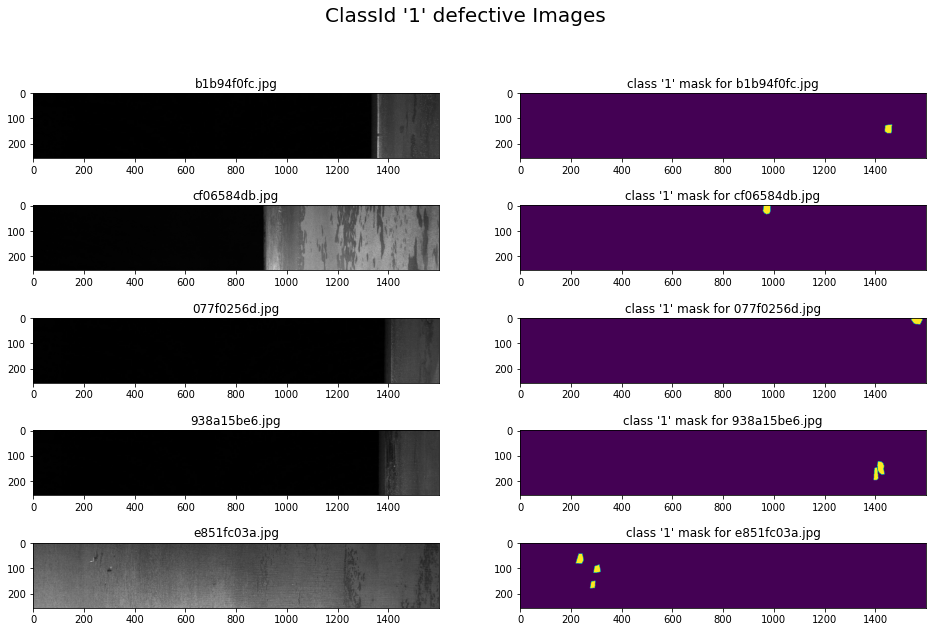

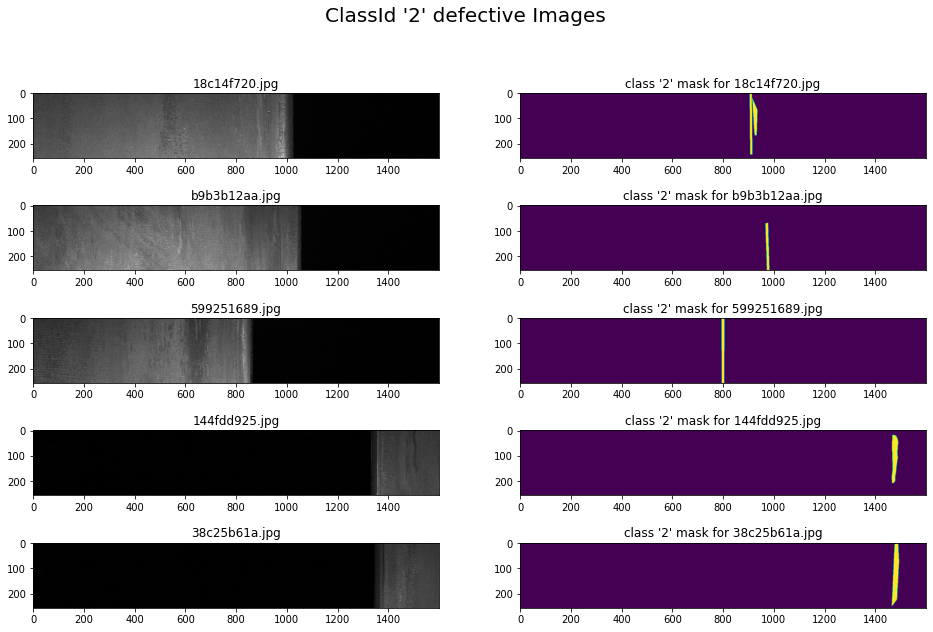

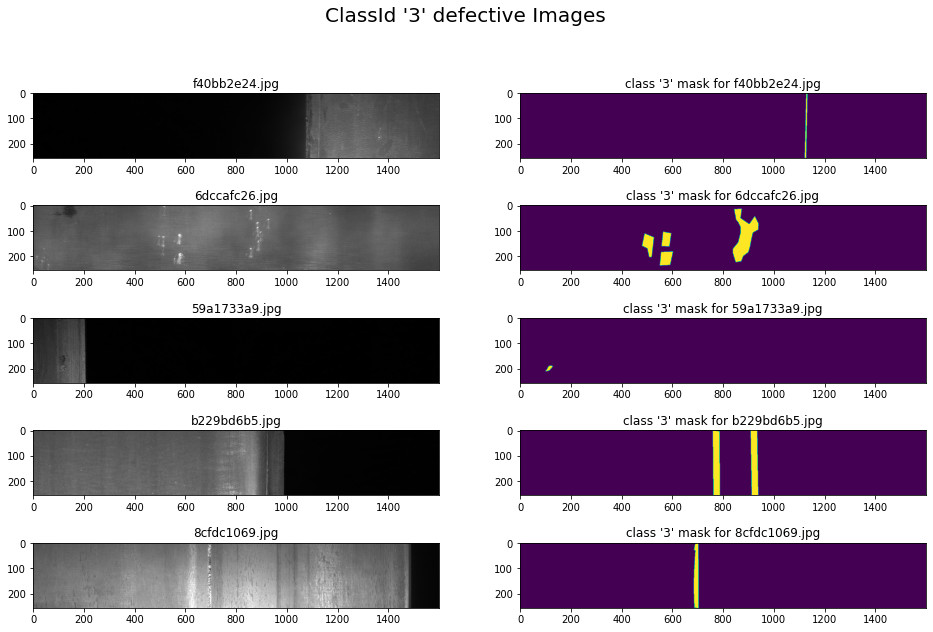

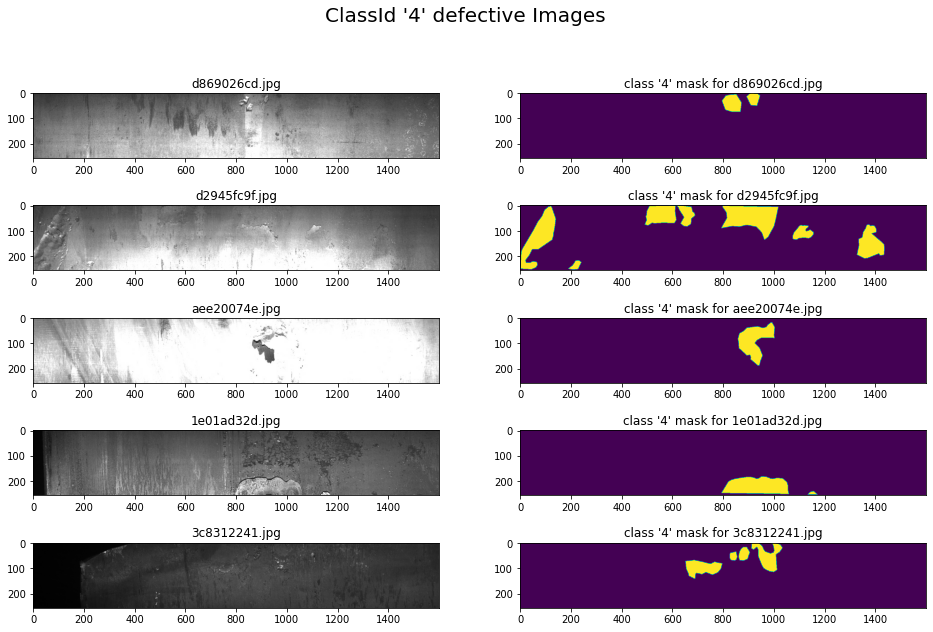

In [39]:
for ClassId in [1,2,3,4]:
    class_df = df[df['ClassId'] == ClassId]
    fig, axs = plt.subplots(5, 2, figsize=(16,10))
    fig.suptitle("ClassId '{}' defective Images".format(ClassId), fontsize=20)
    x,y = 0,0
    for i, img_id in enumerate(random.sample(set(class_df['ImageId'].values), 5)):
        img_obj = cv2.imread('train_images/'+ img_id)
        axs[i,0].imshow(img_obj)
        axs[i,0].set_title(img_id)
        rle = class_df[class_df['ImageId'] == img_id]['EncodedPixels'].iloc[0]
        mask = rle2mask(rle)
        axs[i,1].imshow(mask)
        axs[i,1].set_title("class '{}' mask for ".format(ClassId) + img_id)
    plt.show()
    print('='*100)

# **Zaključak**

Istraživanjem došla sam do zaključka da se primenom CNN vrste neuronske mreže može izvršiti efikasno kreiranje modela algoritma mašinskog učenja koji je pogodan za rad sa fotografijama. Cilj algoritma jeste pronalazak odnosno detekcija oštećenja na površini metala i klasifikacija datih fotografija u određenje klase.  

Zbog ograničene RAM memorije na Google Colab okruženju, mogla sam da kreiram 10 epoha iako verujem da bi uspešnost bila u drugom slučaju veća. Nakon 7 prolazaka (epohe) kroz set fotografija, model prestaje da daje bolje rezultate za vrednosti gubitka. To je vreme prekida trening. Postignuta tačnost je 77%. U ovom slučaju je sasvim korektan accuracy.

Verujem da algoritam može dodatno da se unapredi dodavanjem slojeva neuronske mreže, primenom drugih vrsta modela ili igranjem sa hiperparametrima.

# **Literatura**


1.   Vežbe 9, 10.
2.   Neuronske mreže i duboko učenje [CNN](http://ml.matf.bg.ac.rs/readings/slajdovi/10_NeuronskeMreze.pdf)
3. CNN slojevi [CNN slojevi](https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/)
4. Mašinsko učenje [Trening podata](http://ai.fon.bg.ac.rs/wp-content/uploads/2016/10/ML_intro_2016.pdf)



